In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the cleaned data
df = pd.read_pickle("../data_frames/dependency_parsed_data/df_train_cleaned.pkl")

In [5]:
def plot_normalized_overlap(df, title, bins, type):
    o_len = df[type+'_overlap_count'].values
    max_len = np.minimum(df[type+'_ans_wordcount'].values, df[type+'_q_wordcount'].values)
    frac_len = o_len/max_len
    # print('frac_len: ', frac_len)
    mean = np.nanmean(frac_len)
    print('mean: ', mean)
    # flat_list = [item for sublist in locations for item in sublist]
    plt.hist(frac_len, bins=bins, color="teal")
    plt.axvline(mean, color='rebeccapurple', linestyle='dashed', linewidth=1, label='mean: {:.2f}'.format(mean))
    plt.ylabel('Count')
    plt.xlabel('Fraction of words overlapping')
    plt.legend()
    plt.title(title)
    plt.show()

mean:  0.5333464713591898


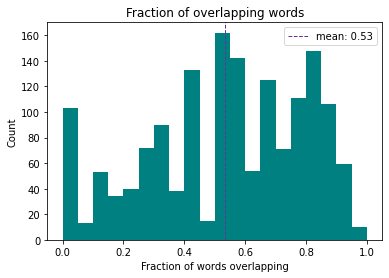

mean:  0.6019594876307985


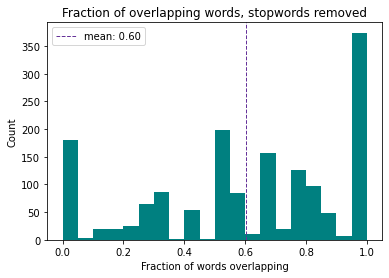

mean:  0.5901611496508824


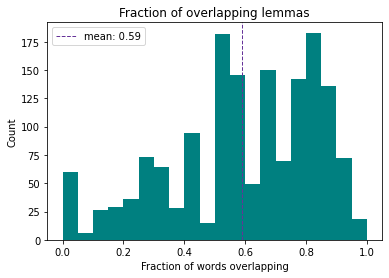

mean:  0.6776819619758189


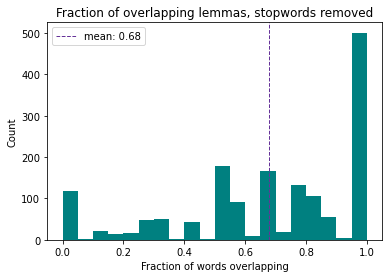

In [6]:
plot_normalized_overlap(df, 'Fraction of overlapping words', 20, 'word')
plot_normalized_overlap(df, 'Fraction of overlapping words, stopwords removed', 20, 'word_stop')
plot_normalized_overlap(df, 'Fraction of overlapping lemmas', 20, 'lemma')
plot_normalized_overlap(df, 'Fraction of overlapping lemmas, stopwords removed', 20, 'lemma_stop')

In [7]:
# find the question answer pairs where there is no / little overlap in words
def print_overlap(filename, df, type):
    with open(filename, 'w') as out:
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('overlapping words: ' + ' '.join(row[type+'_overlap_words']) + '\n')
            out.write('question: ' + row['question'] + '\n')
            out.write('answer: ' + row['answer'] + '\n')
            out.write('sentence with answer: '+ row['sent_with_ans']+ '\n')



df_train_little_overlap_word = df.loc[df['word_overlap_count'] == 0]
print('Number of Q/A pairs that have no word overlap: ', len(df_train_little_overlap_word)/len(df))
print_overlap('../figures/question-answer-pairs-no-overlap-word.txt', df_train_little_overlap_word, 'word')

df_train_little_overlap_word_stop = df.loc[df['word_stop_overlap_count'] == 0]
print('Number of Q/A pairs that have no word overlap (stopwords removed): ', len(df_train_little_overlap_word_stop)/len(df))
print_overlap('../figures/question-answer-pairs-no-overlap-word-stop.txt', df_train_little_overlap_word_stop, 'word_stop')

df_train_little_overlap_lemma = df.loc[df['lemma_overlap_count'] == 0]
print('Number of lemmatized Q/A pairs that have no word overlap: ', len(df_train_little_overlap_lemma)/len(df))
print_overlap('../figures/question-answer-pairs-no-overlap-lemma.txt', df_train_little_overlap_lemma, 'lemma')

df_train_little_overlap_lemma_stop = df.loc[df['lemma_stop_overlap_count'] == 0]
print('Number of lemmatized Q/A pairs that have no lemma overlap (stopwords removed): ', len(df_train_little_overlap_lemma_stop)/len(df))
print_overlap('../figures/question-answer-pairs-no-overlap-lemma-stop.txt', df_train_little_overlap_lemma_stop, 'lemma_stop')

Number of Q/A pairs that have no word overlap:  0.06523115896136795
Number of Q/A pairs that have no word overlap (stopwords removed):  0.11462951234958835
Number of lemmatized Q/A pairs that have no word overlap:  0.03799873337555415
Number of lemmatized Q/A pairs that have no lemma overlap (stopwords removed):  0.0740975300823306
